# **Happiness score**

In [ ]:
#  import the necesary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
# lets import the necessary datasets
from google.colab import files
uploaded=files.upload()

Saving world-happiness-report.csv to world-happiness-report.csv


In [ ]:
import io
happiness=pd.read_csv(io.BytesIO(uploaded['world-happiness-report.csv']))

In [ ]:
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving world-happiness-report-2021.csv to world-happiness-report-2021.csv


In [ ]:
import io
happiness_2021=pd.read_csv(io.BytesIO(uploaded['world-happiness-report-2021.csv']))

In [ ]:
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
print(happiness.shape)
print(happiness_2021.shape)

(1949, 11)
(149, 20)


In [ ]:
# let us rename some columns
happiness.rename(columns={'Life Ladder':'Ladder score',
                          'Log GDP per capita':'Logged GDP per capita',
                          'Healthy life expectancy at birth':'Healthy life expectancy'})

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In this analysis, areas of interest will be

'Country name',
'Regional indicator',
'Ladder score',
'Logged GDP per capita',
'Social support',
'Healthy life expectancy',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption'
For that reason we will make further adjustments.

In [ ]:
happiness1_2021= happiness_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy()

In [ ]:
happiness1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
happiness1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [ ]:
happiness1_2021.duplicated().sum()

0

In [ ]:
happiness1_2021.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
happiness1_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [ ]:
# lets find the correlation
happiness1_2021.corr()

<ipython-input-18-b479e6db1b3d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [ ]:
# Happiness score(Ladder Score) has strong level correlation with GDP, Social Support, Healthy life Expectancy.

# Freedom to make life choice and happiness score have mid level correlation between them.
# Perception of corruption and happiness score have weak level negative level correlation between them.

<ipython-input-19-a3203845ca0d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

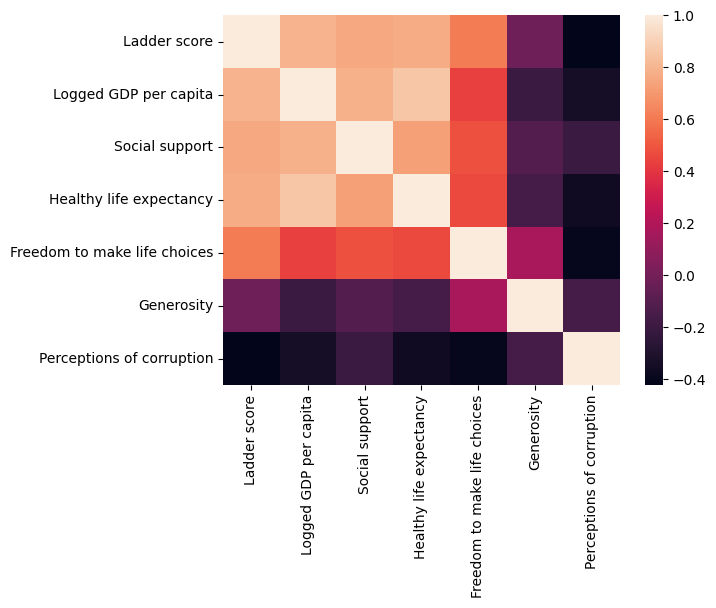

In [ ]:
sns.heatmap(happiness1_2021.corr())

In [ ]:
# let us view the happiness score at the regional level
happiness1_2021.groupby('Regional indicator')['Ladder score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.25500,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.74950,6.179
East Asia,6.0,5.810333,0.439913,5.339,5.52700,5.7610,5.91625,6.584
Latin America and Caribbean,20.0,5.908050,0.693467,3.615,5.75200,5.9920,6.31100,7.069
Middle East and North Africa,17.0,5.219765,0.999259,3.658,4.58400,4.8870,6.10600,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.20650,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.11150,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.88000,6.377
Sub-Saharan Africa,36.0,4.494472,0.654892,3.145,4.09850,4.6160,4.99925,6.049


In [ ]:
# western europe has the highest happiness score while sub-saharan africa  has the lowest happiness score

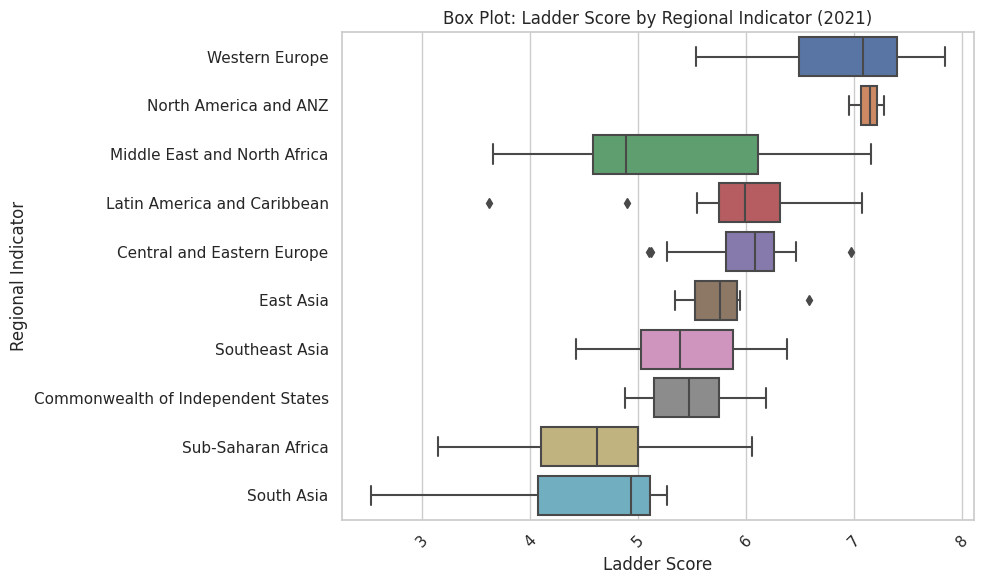

In [ ]:




# Set the plot style
sns.set(style='whitegrid')

# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=happiness1_2021, x='Ladder score', y='Regional indicator')

# Add individual data points using swarm plot (optional)
#sns.swarmplot(data=happiness1_2021, x='Ladder score', y='Regional indicator', color='black', alpha=0.7)

# Customize the plot
plt.xlabel('Ladder Score')
plt.ylabel('Regional Indicator')
plt.title('Box Plot: Ladder Score by Regional Indicator (2021)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# lets look into detail in the central and eastern europe
center_east_europe = happiness1_2021[happiness1_2021['Regional indicator']=='Central and Eastern Europe']

center_east_europe

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
28,Slovenia,Central and Eastern Europe,6.461,10.529,0.948,71.400,0.949,-0.101,0.806
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.800,0.909,-0.106,0.527
43,Poland,Central and Eastern Europe,6.166,10.382,0.898,69.702,0.841,-0.165,0.735
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
47,Serbia,Central and Eastern Europe,6.078,9.787,0.873,68.600,0.778,0.002,0.835
50,Latvia,Central and Eastern Europe,6.032,10.315,0.927,67.100,0.715,-0.162,0.800


In [ ]:
# lets see its correlation
center_east_europe.corr()

<ipython-input-25-c5f190cc9403>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.560664,0.582957,0.333319,0.518679,-0.276712,-0.245990
Logged GDP per capita,0.560664,1.000000,0.775892,0.597408,0.318199,-0.881543,-0.428930
Social support,0.582957,0.775892,1.000000,0.389284,0.158672,-0.507258,-0.318341
Healthy life expectancy,0.333319,0.597408,0.389284,1.000000,0.217689,-0.550233,-0.230517
Freedom to make life choices,0.518679,0.318199,0.158672,0.217689,1.000000,-0.084180,-0.410780
Generosity,-0.276712,-0.881543,-0.507258,-0.550233,-0.084180,1.000000,0.220205
Perceptions of corruption,-0.245990,-0.428930,-0.318341,-0.230517,-0.410780,0.220205,1.000000


<ipython-input-26-267d7114a5de>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

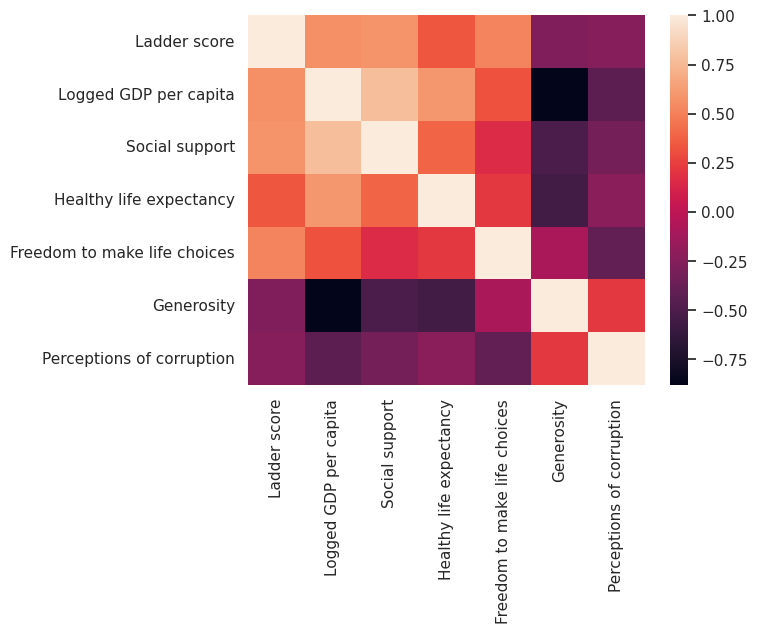

In [ ]:
sns.heatmap(center_east_europe.corr())

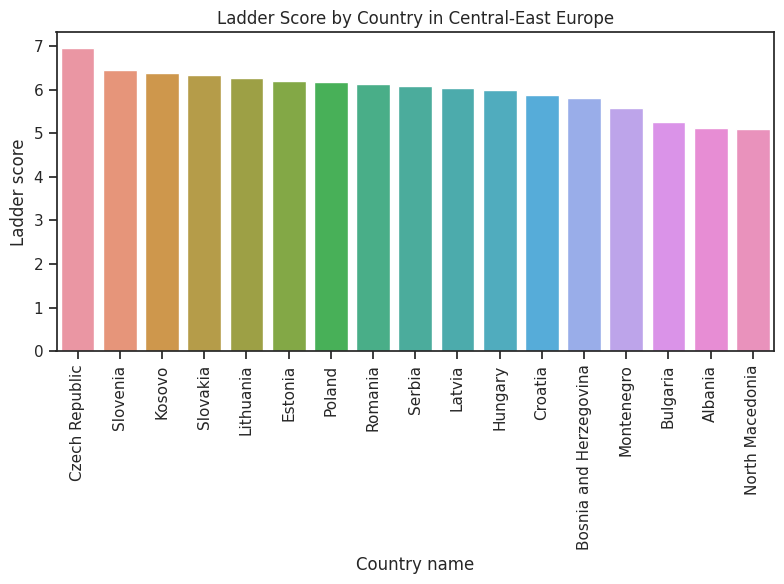

In [ ]:
# let us make some visualization


sns.set(style='ticks')

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=center_east_europe, x='Country name', y='Ladder score')

# Customize the plot
plt.xlabel('Country name')
plt.xticks(rotation=90)
plt.ylabel('Ladder score')
plt.title('Ladder Score by Country in Central-East Europe')

# Show the plot
plt.tight_layout()
plt.show()










happiness and gdp

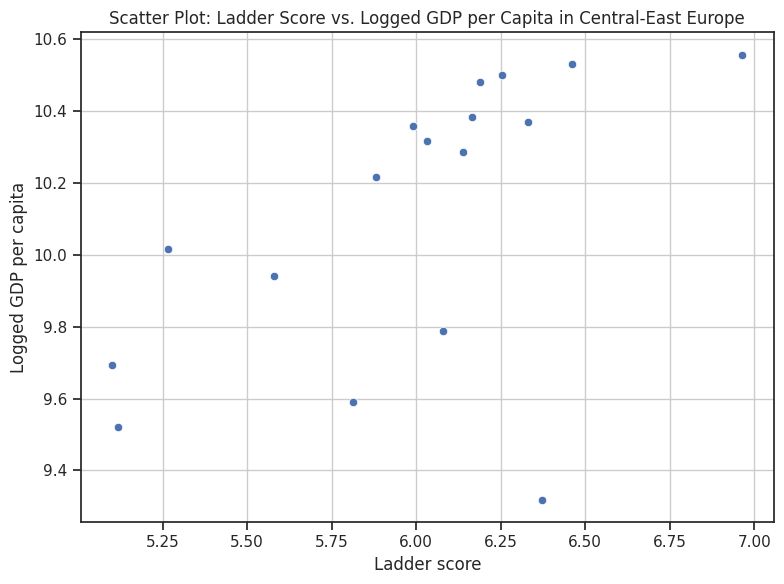

In [ ]:
# Set the plot style
sns.set(style='ticks')

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=center_east_europe, x='Ladder score', y='Logged GDP per capita')

# Add additional details
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita')
plt.title('Scatter Plot: Ladder Score vs. Logged GDP per Capita in Central-East Europe')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()










Happiness score and social support

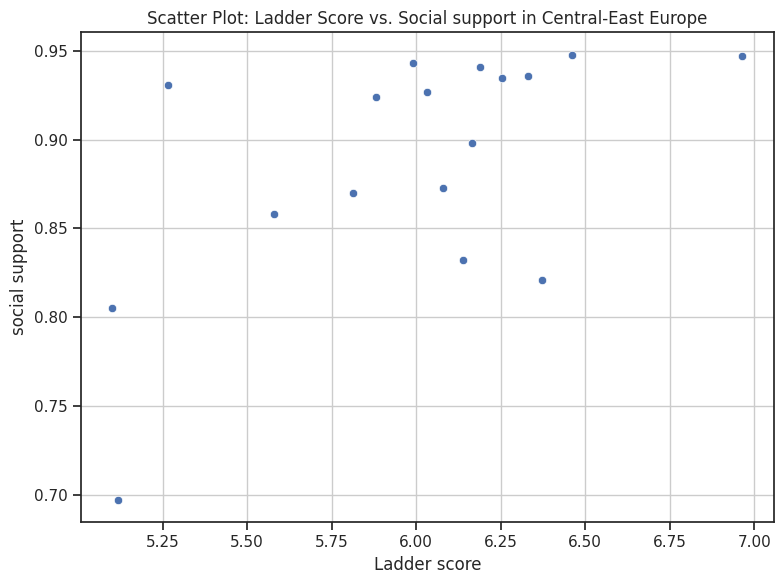

In [ ]:
# Set the plot style
sns.set(style='ticks')

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=center_east_europe, x='Ladder score', y='Social support')

# Add additional details
plt.xlabel('Ladder score')
plt.ylabel('social support')
plt.title('Scatter Plot: Ladder Score vs. Social support in Central-East Europe')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()










Happiness Score & Perceptions of Corruption

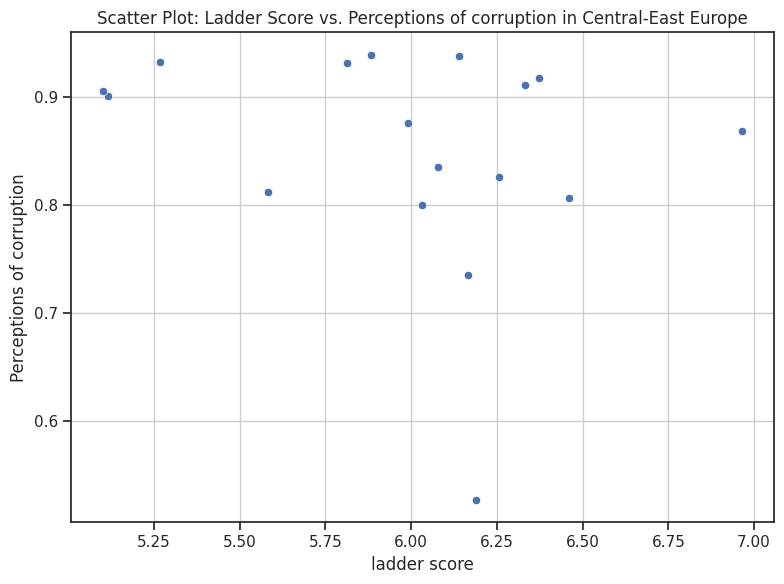

In [ ]:
# Set the plot style
sns.set(style='ticks')

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=center_east_europe, x='Ladder score', y='Perceptions of corruption')

# Add additional details
plt.xlabel('ladder score')
plt.ylabel('Perceptions of corruption')
plt.title('Scatter Plot: Ladder Score vs. Perceptions of corruption in Central-East Europe')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()










Happiness Score & Healthy Life Expectancy

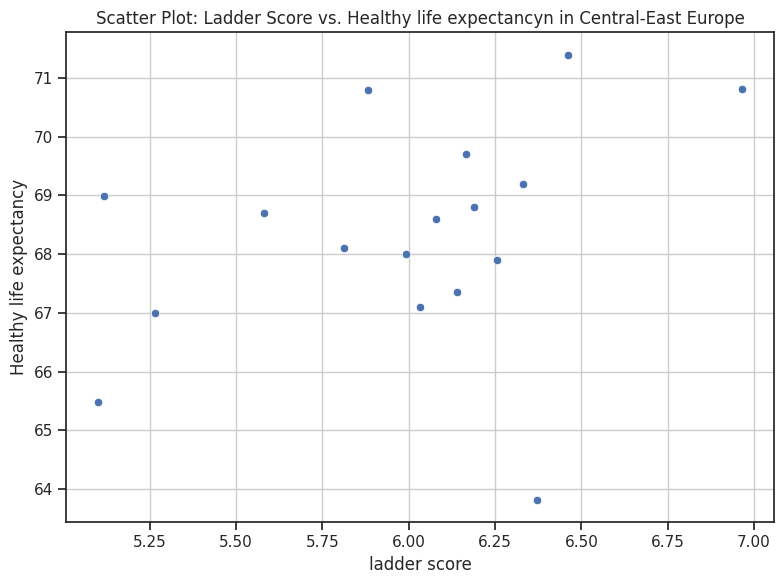

In [ ]:
# Set the plot style
sns.set(style='ticks')

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=center_east_europe, x='Ladder score', y='Healthy life expectancy')

# Add additional details
plt.xlabel('ladder score')
plt.ylabel('Healthy life expectancy')
plt.title('Scatter Plot: Ladder Score vs. Healthy life expectancyn in Central-East Europe')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()










Happiness Score & Freedom to Make Life Choices

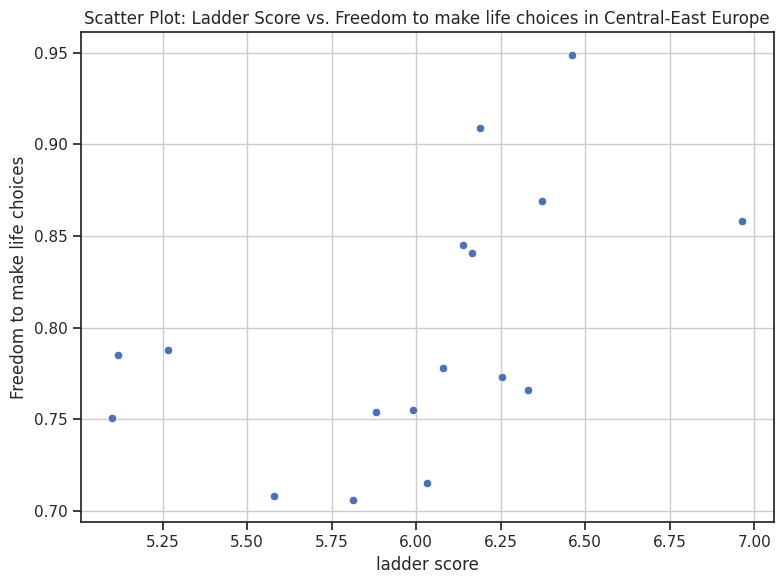

In [ ]:
# Set the plot style
sns.set(style='ticks')

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=center_east_europe, x='Ladder score', y='Freedom to make life choices')

# Add additional details
plt.xlabel('ladder score')
plt.ylabel('Freedom to make life choices')
plt.title('Scatter Plot: Ladder Score vs. Freedom to make life choices in Central-East Europe')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()








